<a href="https://colab.research.google.com/github/bunnybbear/bsc_dpdm22/blob/main/Project_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.kaggle.com/datasets/ayessa/salary-prediction-classification

# รายชื่อสมาชิกกลุ่ม
- 3. นางสาวณัชกมล อัมฤตานนท์ 633020439-4
- 6. นางสาวทิพเกษร ยอดคุณ 633020442-5
- 25. นางสาวปิ่นมนัส สุระเกษ 633021018-3
- 34. นางสาวอภิศรา พงษ์เซียงซา 633021027-2

# สไลด์
https://www.canva.com/design/DAFeaN7R7Rk/8a-Tv8L1AYjlV7AKroX-sg/edit?utm_content=DAFeaN7R7Rk&utm_campaign=designshare&utm_medium=link2&utm_source=sharebutton

In [1]:
import pandas as pd
import os

In [2]:
#cross validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut
#decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
#Naive Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
#KNN
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
#association rules
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
#k-means
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [3]:
#association rules
#!pip install apyori
#from apyori import apriori

In [4]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [5]:
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# import data

In [6]:
data_salary = pd.read_csv('/content/gdrive/MyDrive/bscpj/salary.csv')
print(data_salary.shape)
data_salary.head(3)

(32561, 15)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K


# Data preparation

## สร้างคอลัมน์ ID ให้กับข้อมูล

In [7]:
#data_salary['ID'] = data_salary.reset_index().index

## Select columns

In [8]:
data_salary.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'salary'],
      dtype='object')

In [9]:
data = data_salary[['age', 'workclass', 'education', 'marital-status',
       'occupation', 'relationship', 'race', 'sex', 
       'hours-per-week', 'native-country',
       'salary']]

In [10]:
data.shape

(32561, 11)

## check missing

In [11]:
data.isnull().any()

age               False
workclass         False
education         False
marital-status    False
occupation        False
relationship      False
race              False
sex               False
hours-per-week    False
native-country    False
salary            False
dtype: bool

จากการ check missing พบว่า ไม่มี missing

แต่มีข้อมูลที่ไม่ทราบค่าซึ่งแสดงในสัญลักษณ์ '?'

In [12]:
unknow = data[(data['workclass'] == ' ?') | (data['occupation'] == ' ?') | (data['native-country'] == ' ?')]
print(unknow.shape)
unknow.head(3)

(2399, 11)


,age,workclass,education,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,salary
14,40,Private,Assoc-voc,Married-civ-spouse,Craft-repair,Husband,Asian-Pac-Islander,Male,40,?,>50K
27,54,?,Some-college,Married-civ-spouse,?,Husband,Asian-Pac-Islander,Male,60,South,>50K
38,31,Private,Some-college,Married-civ-spouse,Sales,Husband,White,Male,38,?,>50K


จึงทำการ drop ออก

In [13]:
data.drop(unknow.index, inplace=True)

<ipython-input-13-72853082ba6f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(unknow.index, inplace=True)


## เปลี่ยนค่าในคอลัมน์ salary 
- ' <=50K' เป็น 0
- ' >50K' เป็น 1

In [14]:
data['salary'] = data['salary'].map({' <=50K': 0, ' >50K': 1})

<ipython-input-14-44f8c87484ba>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['salary'] = data['salary'].map({' <=50K': 0, ' >50K': 1})


In [15]:
data.head(10)

,age,workclass,education,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,salary
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,0
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,0
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,0
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,0
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,0
5,37,Private,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,40,United-States,0
6,49,Private,9th,Married-spouse-absent,Other-service,Not-in-family,Black,Female,16,Jamaica,0
7,52,Self-emp-not-inc,HS-grad,Married-civ-spouse,Exec-managerial,Husband,White,Male,45,United-States,1
8,31,Private,Masters,Never-married,Prof-specialty,Not-in-family,White,Female,50,United-States,1
9,42,Private,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,40,United-States,1


## Convert categorical variables to numerical

แปลงข้อมูลในคอลัมน์ที่เป็นตัวอักษร ให้อยู่ในรูปแบบของ category และทำการ encoding เป็นรหัส (codes) ซึ่งจะช่วยให้สามารถนำไปใช้กับแบบจำลองที่รับเฉพาะข้อมูลแบบตัวเลขได้ โดยรหัสที่ถูกแทนให้จะเป็นตัวเลขที่มีค่าต่างๆ ตามจำนวน category ที่มีในคอลัมน์นั้นๆ

In [16]:
data['workclass'] = data['workclass'].astype('category').cat.codes
data['education'] = data['education'].astype('category').cat.codes
data['marital-status'] = data['marital-status'].astype('category').cat.codes
data['occupation'] = data['occupation'].astype('category').cat.codes
data['relationship'] = data['relationship'].astype('category').cat.codes
data['race'] = data['race'].astype('category').cat.codes
data['sex'] = data['sex'].astype('category').cat.codes
data['native-country'] = data['native-country'].astype('category').cat.codes

<ipython-input-16-4c00740fa26e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['workclass'] = data['workclass'].astype('category').cat.codes
<ipython-input-16-4c00740fa26e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['education'] = data['education'].astype('category').cat.codes
<ipython-input-16-4c00740fa26e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

In [17]:
data.head(3)

,age,workclass,education,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,salary
0,39,5,9,4,0,1,4,1,40,38,0
1,50,4,9,2,3,0,4,1,13,38,0
2,38,2,11,0,5,1,4,1,40,38,0


## Split the data into training and testing sets

X คือ feature หรือตัวแปรที่ใช้ในการทำนาย และ y คือ target หรือผลลัพธ์ที่ต้องการทำนาย

In [18]:
features = ['age', 'workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex',  'hours-per-week', 'native-country']
X = data[features]
y = data['salary']

โดยแบ่งเป็น train 70% test 30%

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Decision tree

##  GridSearchCV
ใช้วิธีการทำ Grid Search โดยกำหนดค่าพารามิเตอร์ต่างๆ ของ Decision Tree และใช้ cross_val_score
ในการทำ cross-validation แล้วหาค่าเฉลี่ยของคะแนนที่ได้จากทุก fold ของข้อมูล
ซึ่งผลลัพธ์ที่ได้จะแสดงค่าพารามิเตอร์ที่ดีที่สุดและค่าเฉลี่ยของคะแนน accuracy ที่ได้จาก cross-validation
ในที่นี้เราจะเลือกเป็น 10-fold-cross-validation

In [20]:
# Define the Decision Tree model
dt = DecisionTreeClassifier(random_state=42)

# Define the hyperparameter values to be tested
param_grid = {'max_depth': [1,2,3],
              'min_samples_split': [2, 4, 6]}

# Use Grid Search to find the best hyperparameter combination
grid_search = GridSearchCV(dt, param_grid, cv=10, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best hyperparameter combination and the associated accuracy score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Print the results
print("Best hyperparameters:", best_params)
print(f'Best accuracy score: {best_score:.2f}')

Best hyperparameters: {'max_depth': 3, 'min_samples_split': 2}
Best accuracy score: 0.79


จาก output จะเห็นว่า max dept ที่เหมาะสมที่สุดคือ 5 และ min samples split ที่เหมาะสมที่สุดคือ 2
โดยที่ Best accuracy score คือ 0.79 

## Define , Train and Predict - evaluate

In [21]:
#Define
clf = DecisionTreeClassifier(max_depth=3,min_samples_leaf=2)

# Train
clf.fit(X_train, y_train)

# Evaluate 
y_pred = clf.predict(X_test)

## Accuracy , Classification report and Mean cross-validation

In [22]:
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print('Classification report:\n', report)

Accuracy: 0.78
Classification report:
               precision    recall  f1-score   support

           0       0.88      0.82      0.85      6767
           1       0.55      0.67      0.60      2282

    accuracy                           0.78      9049
   macro avg       0.72      0.74      0.73      9049
weighted avg       0.80      0.78      0.79      9049



- accuracy ของข้อมูลนี้คือ 78%
- classification report จาก precision และ recall จะเห็นได้ว่าโมเดลนี้ มีความแม่นยำในการทำนายclass 0 ดีกว่าการทำนาย
class 1 ก็คือ การทำนายเงินเดือนที่น้อยกว่าหรือเท่ากับ 5 หมื่น มีความแม่นยำกว่า การทำนายเงินเดือนที่ ที่มากกว่า 5
หมื่นดอลล่า
โดยที่มีค่า f1-score สูงสุดที่ 0.85 สำหรับ class 0 และ 0.60 สำหรับ class 1


In [23]:
scores = cross_val_score(clf, X_train, y_train, cv=10)
print(f'Mean cross-validation score: {scores.mean():.2f}')

Mean cross-validation score: 0.79


ค่า Mean cross-validation score หรือ ค่าเฉลี่ยของประสิทธิภาพของโมเดลในแต่ละ fold มีค่า 79%

### หน้าตาต้นไม้

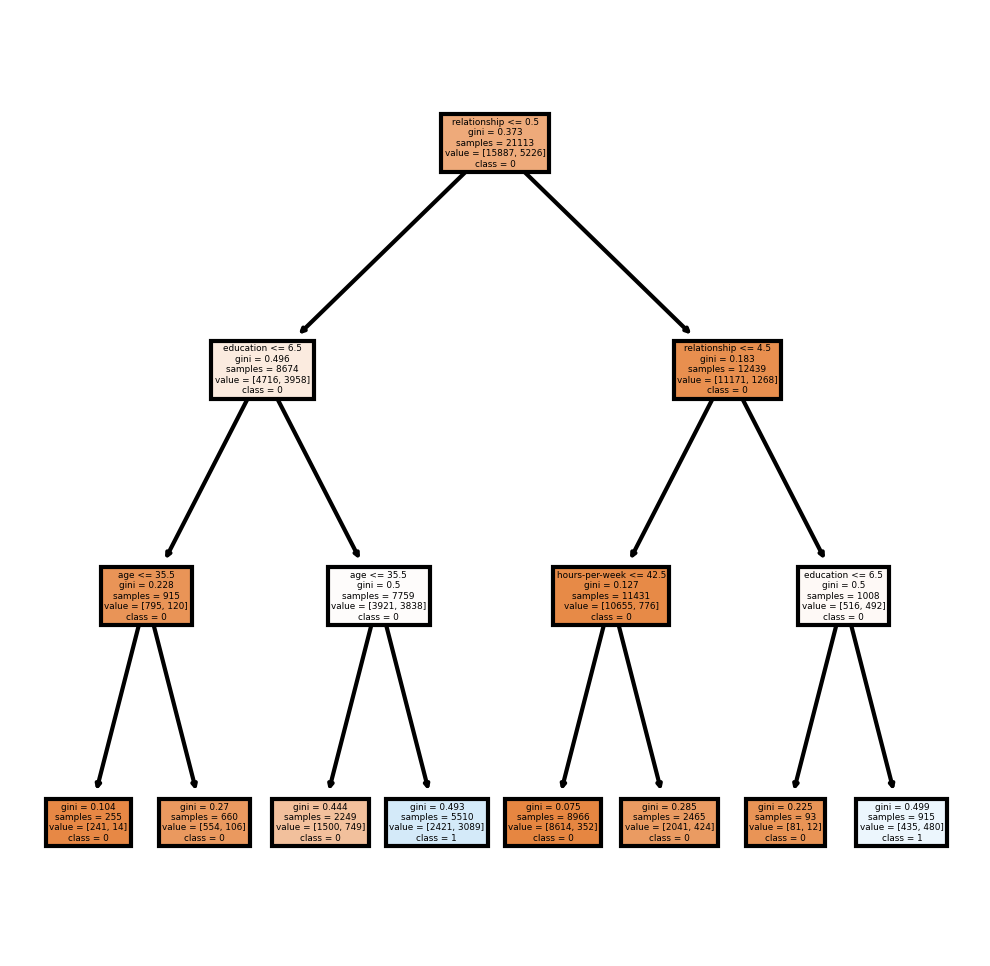

In [24]:
# Define the Decision Tree model with max_depth=3
dt = DecisionTreeClassifier(max_depth=3, random_state=42)

# Fit the model on the training data
dt.fit(X_train, y_train)

# Visualize the Decision Tree
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
plot_tree(dt, filled=True, feature_names=X.columns, class_names=['0', '1'], ax=axes);

Sample คือ จำนวนข้อมูลที่กันได้กับ node จากภาพจะเห็นว่าจำนวน sample จะลดลงเรื่อยๆ เนื่องจาก มี
การตัดสินใจลงมาเรื่อยๆ

gini คือค่าบ่งชี้ความบริสุทธิ์ของ node จากภาพจะเห็นว่าค่าค่อยข้างต่ำ คือ น้อยกว่า 0.5 นั่นแปลว่า ข้อมูล
อยู่ใน class เดียวกัน แต่ในบาง node ก็มีค่า gini=0.5 เช่น age น้อยกว่าหรือเท่ากับ 35.5 หรือ education
น้อยกว่าหรือเท่ากับ 6.5 ซึ่งนั่นแปลว่า ข้อมูลใน node นั้นอยู่ใน 2 class เท่าๆกัน

การนำภาพไฟล์ภาพออกมา

In [25]:
from sklearn.tree import export_graphviz
import graphviz

dot_data = export_graphviz(clf, out_file=None, 
                           feature_names=X.columns,  
                           class_names=y.astype(str).unique(),  
                           filled=True, rounded=True,  
                           special_characters=True)

graph = graphviz.Source(dot_data)
graph.render('decision_tree')

'decision_tree.pdf'

In [26]:
from google.colab import files
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Download the file from Colab to Google Drive
files.download('/content/decision_tree.pdf')

# Unmount Google Drive (optional)
drive.flush_and_unmount()

Mounted at /content/drive


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Naive Bayes 

Gaussian Naive Bayes ซึ่งเหมาะสำหรับข้อมูลต่อเนื่องและมีการกระจายตัวของข้อมูล จึงเหมาะสมกับข้อมูล Salary Prediction

## GridSearchCV
กำหนด param_grid ของ var_smoothing ที่แบ่งค่าตั้งแต่ 1 ถึง 10 ยกกำลัง -9 เป็นจำนวน 100 จุดและใช้ cross-validation เพื่อหาค่า var_smoothing ที่ดีที่สุด


In [27]:
# กำหนดค่า var_smoothing ที่จะทดสอบ
param_grid = {'var_smoothing': np.logspace(0,-9, num=100)}

# สร้างตัวแบบ GaussianNB
gnb = GaussianNB()

# ใช้ GridSearchCV ในการหาค่า var_smoothing ที่ดีที่สุด
grid_search = GridSearchCV(gnb, param_grid=param_grid, cv=10, scoring='accuracy')
grid_search.fit(X_train, y_train)

# แสดงค่า var_smoothing ที่ดีที่สุดและค่าความแม่นยำที่ได้
print("Best var_smoothing:", grid_search.best_params_)
print(f'Accuracy: {grid_search.best_score_:.2f}')

Best var_smoothing: {'var_smoothing': 0.01}
Accuracy: 0.78


## Define , Train and Predict - evaluate

In [28]:
#Define
gnb = GaussianNB(var_smoothing = 0.01)

#train 
gnb.fit(X_train, y_train)

#test
y_pred = gnb.predict(X_test)

## Accuracy , Classification report and Mean cross-validation

In [29]:
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print('Classification report:\n', report)

Accuracy: 0.78
Classification report:
               precision    recall  f1-score   support

           0       0.85      0.85      0.85      6767
           1       0.56      0.55      0.56      2282

    accuracy                           0.78      9049
   macro avg       0.71      0.70      0.70      9049
weighted avg       0.78      0.78      0.78      9049



- accuracy ของข้อมูลนี้คือ 78%
- classification report จาก precision และ recall จะเห็นได้ว่าโมเดลนี้ มีความแม่นยำในการทำนายclass 0 ดีกว่าการทำนาย
class 1 ก็คือ การทำนายเงินเดือนที่น้อยกว่าหรือเท่ากับ 5 หมื่น มีความแม่นยำกว่า การทำนายเงินเดือนที่ ที่มากกว่า 5
หมื่นดอลล่า
โดยที่มีค่า f1-score สูงสุดที่ 0.85 สำหรับ class 0 และ 0.56 สำหรับ class 1


In [30]:
scores = cross_val_score(gnb, X_train, y_train, cv=10)
print(f'Mean cross-validation score: {scores.mean():.2f}')

Mean cross-validation score: 0.78


ค่า Mean cross-validation score หรือ ค่าเฉลี่ยของประสิทธิภาพของโมเดลในแต่ละ fold มีค่า 78%

# K-Nearest Neighbor

## GridSearchCV
ใช้วิธี GridSearchCV ทำการทดสอบค่า k ต่าง ๆ และเลือกค่า k ที่ให้ผลลัพธ์ที่ดีที่สุด
ที่กำหนดค่า n_neighbors ในที่นี้เราจะเลือกเป็น 10-fold-cross-validation

ค่า k ควรเลือกตั้งแต่ 1-20 ถ้าเกินนี้ข้อมูล
อาจจะ overfitting

In [31]:
# กำหนดค่า k ที่ต้องการทดสอบ
param_grid = {'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 17, 19]}

# สร้างโมเดล KNN
knn = KNeighborsClassifier()

# ใช้ GridSearchCV ในการหาค่า k ที่ดีที่สุด
grid_search = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')
grid_search.fit(X_train, y_train)

# แสดงค่า k ที่ดีที่สุด
print("Best k: ", grid_search.best_params_['n_neighbors'])

Best k:  13


จาก out put จะได้ k ที่ดีที่สุด คือ 13

## normalize ข้อมูลด้วย StandardScaler
ทำให้ค่าของแต่ละ feature อยู่ในช่วง
เดียวกันและช่วยให้โมเดลไม่มี bias ในการเรียนรู้จาก feature

In [32]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Define , Train and Predict - evaluate

metric='euclidean' คือการระบุวิธีการคำนวณระยะห่างระหว่างจุด ซึ่งคำนวณจากตำแหน่งของจุดในระบบพิกัดสองมิติ หรือมากกว่า 2 มิติก็ได้
นิยมใช้กันอย่างแพ่หลาย

In [33]:
#Define
knn = KNeighborsClassifier(n_neighbors=13, metric='euclidean')

#Train
knn.fit(X_train, y_train)

#evalution
y_pred = knn.predict(X_test)

## Accuracy , Classification report and Mean cross-validation

In [34]:
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print('Classification report:\n', report)

Accuracy: 0.81
Classification report:
               precision    recall  f1-score   support

           0       0.86      0.90      0.88      6767
           1       0.65      0.57      0.61      2282

    accuracy                           0.81      9049
   macro avg       0.76      0.73      0.74      9049
weighted avg       0.81      0.81      0.81      9049



- accuracy ของข้อมูลนี้คือ 81%
- classification report จาก precision และ recall จะเห็นได้ว่าโมเดลนี้ มีความแม่นยำในการทำนายclass 0 ดีกว่าการทำนาย
class 1 ก็คือ การทำนายเงินเดือนที่น้อยกว่าหรือเท่ากับ 5 หมื่น มีความแม่นยำกว่า การทำนายเงินเดือนที่ ที่มากกว่า 5
หมื่นดอลล่า
โดยที่มีค่า f1-score สูงสุดที่ 0.88 สำหรับ class 0 และ 0.61 สำหรับ class 1


In [35]:
scores = cross_val_score(knn, X_train, y_train, cv=10)
print(f'Mean cross-validation score: {scores.mean():.2f}')

Mean cross-validation score: 0.81


ค่า Mean cross-validation score หรือ ค่าเฉลี่ยของประสิทธิภาพของโมเดลในแต่ละ fold มีค่า 81%

# สรุปผล
สรุปผลจาก 3 Models (Decision tree, Naive Bayes, K-Nearest Neighbor)


1. Decision tree 
    - Mean cross-validation = 79%
    - Accuracy = 78%
2. Naive Bayes
    - Mean cross-validation = 78% 
    - Accuracy = 78%
3. K-Nearest Neighbor
    - Mean cross-validation = 81% 
    - Accuracy = 81%

 **ตัดสินใจเลือก K-Nearest Neighbor เนื่องจากมีค่า Mean cross-validation สูงที่สุด ซึ่งบ่งบอกว่า โมเดลนี้มีประสิทธิภาพมากที่สุด**


# Association rules

- พารามิเตอร์ use_colnames ซึ่งกำหนดเป็น True จะใช้ชื่อคอลัมน์ของข้อมูลเป็นชื่อ itemset แทนที่จะใช้ตัวเลข ซึ่งทำให้ผลลัพธ์ที่ได้ง่ายต่อการอ่านและใช้งานได้ง่ายขึ้น
- การกำหนด metric="lift" และ min_threshold=1 จะหมายความว่าเราจะสร้างกฎผสมที่มีค่า lift
มากกว่าหรือเท่ากับ 1 เท่านั้น

In [36]:
# convert categorical variables into binary form
df = pd.get_dummies(data, columns=['age', 'workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex',  'hours-per-week', 'native-country', 'salary'])

# Generate frequent itemsets
frequent_itemsets = apriori(df, min_support=0.15, use_colnames=True)

# Create DataFrame with support and itemsets columns
frequent_itemsets_df = pd.DataFrame(frequent_itemsets)

# generate association rules
rules = association_rules(frequent_itemsets_df.reset_index(), metric='lift', min_threshold=1)

# sort the rules by lift in descending order
rules = rules.sort_values(by='lift', ascending=False)

# show useful columns only
acc = rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']]
acc

,antecedents,consequents,support,confidence,lift
2271,"(salary_1, marital-status_2, sex_1, race_4)","(native-country_38, relationship_0)",0.165937,0.954788,2.522849
2302,"(native-country_38, relationship_0)","(salary_1, marital-status_2, sex_1, race_4)",0.165937,0.438458,2.522849
2294,"(salary_1, relationship_0, race_4)","(native-country_38, marital-status_2, sex_1)",0.165937,0.957711,2.512306
2279,"(native-country_38, marital-status_2, sex_1)","(salary_1, relationship_0, race_4)",0.165937,0.435293,2.512306
2265,"(native-country_38, marital-status_2, sex_1, s...","(relationship_0, race_4)",0.165937,0.940613,2.505587
...,...,...,...,...,...
466,"(salary_0, sex_0)",(native-country_38),0.262184,0.912111,1.000258
419,(race_4),"(salary_0, relationship_1)",0.196804,0.228898,1.000146
414,"(salary_0, relationship_1)",(race_4),0.196804,0.859916,1.000146
1315,"(salary_0, sex_1)","(native-country_38, race_4)",0.372290,0.802989,1.000073


จาก output ข้างบนจะเห็นว่า row ที่ 2264 และ 2309 มีค่า lift เท่ากัน

แต่เนื่องจาก row 2264 มีค่า confidence = 95.48% ซึ่งมากกว่าค่า confidence ของ row 2309 

แปลว่าเหตุการณ์มีโอกาศเกิดขึ้นมากกว่า row 2309

ดังนั้น row 2264 เป็นที่น่าสนใจที่สุด

จาก row 2264 จะเห็นว่า ถ้า เป็นเพศชายผิวขาวที่แต่งงานแล้ว มีเงินเดือน มากกว่า 50,000$ต่อปี จะมีสถานะเป็นสามี และประเทศบ้านเกิดคือ USA

จากข้อมูลข้างต้นสามารถนำไปใช้ประโยชน์ในทางธุรกิจได้ เช่น การคิดกลยุทธ์สำหรับเพศชายที่มีครอบครัวแล้ว และมีเงินเดือนมากกว่า 50,000$ ต่อปี

# K-means clustering

## elbow method 
เป็นการหาค่า K ที่เหมาะสมโดยการ plot ค่า SSE (Sum of Squared Errors) ของแต่ละค่า K และหาจุดที่เกิด elbow ซึ่งเป็นจุดที่ค่า SSE เริ่มลดลงช้าลง ซึ่งจะช่วยในการเลือกค่า K ที่เหมาะสม

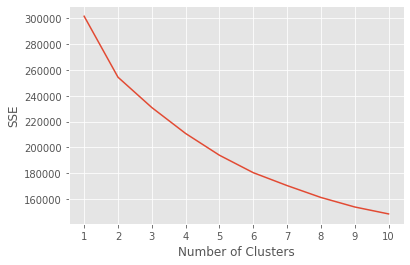

In [37]:
# standardize the data
feature_array = X.values
scaler = StandardScaler()
subset_scaled = scaler.fit_transform(feature_array)

# calculate SSE for a range of number of cluster
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(subset_scaled)
    sse.append(kmeans.inertia_)

# plot SSE for each value of K
plt.style.use('ggplot')
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

จากกราฟ จะเห็นว่าจุด curve หรือ จุดศอก ของกราฟ คือ 2 

ดังนั้นจึงกำหนด k ให้เท่ากับ 2

## Define , Train and Add column 'cluster'

เพิ่มคอลัมน์ cluster ใน data เพื่อดูว่า ข้อมูล row ไหน อยู่ใน cluster ไหน

In [38]:
# set number of clusters
k = 2
kmeans = KMeans(n_clusters=k)

# fit k-means clustering model
kmeans.fit(subset_scaled)

# get cluster labels
data['cluster'] = kmeans.labels_

<ipython-input-38-69d159c38d94>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['cluster'] = kmeans.labels_


In [39]:
data.head(5)

,age,workclass,education,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,salary,cluster
0,39,5,9,4,0,1,4,1,40,38,0,0
1,50,4,9,2,3,0,4,1,13,38,0,0
2,38,2,11,0,5,1,4,1,40,38,0,0
3,53,2,1,2,5,0,2,1,40,38,0,0
4,28,2,9,2,9,5,2,0,40,4,0,1


In [40]:
data['cluster'].value_counts()

0    17875
1    12287
Name: cluster, dtype: int64

จากการทำ clustering สามารถแบ่งกลุ่มข้อมูลที่คล้ายกันได้เป็น 2 กลุ่ม คือ 0,1

โดย 
- กลุ่ม 0 มีจำนวนทั้งหมด 17,871 row
- กลุ่ม 1 มีจำนวนทั้งหมด 12,291 row

แผนภาพ PCA 

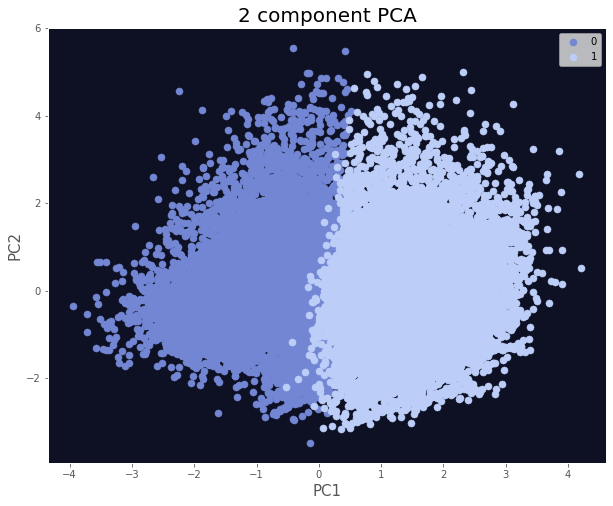

In [41]:
from sklearn.decomposition import PCA

# create PCA object
pca = PCA(n_components=2)

# fit and transform data
principalComponents = pca.fit_transform(subset_scaled)

# create dataframe with principal components and cluster labels
principalDf = pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2'])
principalDf['cluster'] = kmeans.labels_

# plot the principal components colored by cluster
fig = plt.figure(figsize = (10, 8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('PC1', fontsize = 15)
ax.set_ylabel('PC2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
ax.set_facecolor('#0E1124') # เปลี่ยนสีพื้นหลัง
targets = [0, 1]
colors = ['#7286D3','#BCCEF8']
for target, color in zip(targets,colors):
    indicesToKeep = principalDf['cluster'] == target
    ax.scatter(principalDf.loc[indicesToKeep, 'PC1']
               , principalDf.loc[indicesToKeep, 'PC2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

Visualization

In [42]:
c0 = data[data['cluster'] == 0]

In [43]:
c1 = data[data['cluster'] == 1]

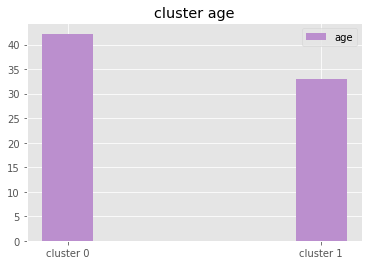

In [44]:
width = 0.2 # ความกว้างของแท่ง

plt.bar([1, 2],[c0['age'].mean(),c1['age'].mean()],width,color=['#BB8FCE'] ,label='age') 

plt.title('cluster age')
plt.xticks([1,2], ['cluster 0','cluster 1'])
plt.legend();

In [45]:
s0 = c0['sex'].value_counts().reset_index()

In [46]:
s1 = c1['sex'].value_counts().reset_index()

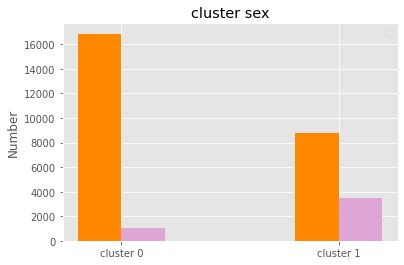

In [47]:
width = 0.2

plt.bar([0.9,1.1],[s0['sex'][0],s0['sex'][1]],width,color=['#FF8800','#DEA6D5']) # ส้ม
plt.bar([1.9,2.1],[s1['sex'][0],s1['sex'][1]],width,color=['#FF8800','#DEA6D5']) # ม่วง

plt.title('cluster sex')
plt.ylabel('Number')
plt.xticks([1,2], labels=['cluster 0','cluster 1'])
plt.legend();
plt.show();
